# Breast Cancer Detection Using Machine Learning

Aim: To predict whether the tumor is malignant or benign

Data Collection: Breast Cancer Wisncosin (Diagnostic) Data Set : 
 https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Data Preprocessing

In [1]:
#Import all the crucial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750,NaN


In [3]:
df.shape #569 rows and 33 columns

(569, 33)

In [4]:
#Data Cleaning
df.isnull().sum() #checking for null values in every column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Deleting the unnamed column because all its values are null values
df=df.dropna(axis=1)

In [6]:
df.shape

(569, 32)

In [7]:
#Getting a count of the number of malignant and benign cells
# the column 'diagnosis' indicates the class
df['diagnosis'].value_counts()
#B: Benign means not cancerous
#M: Malignant means cancerous

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

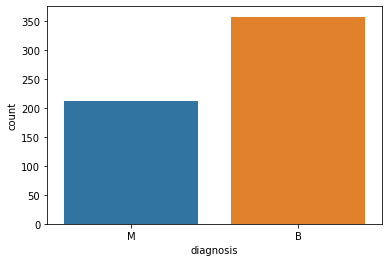

In [8]:
#Visualize the count
sns.countplot(df['diagnosis'],label='count')

In [9]:
#Checking for categorical variables
categorical=df.select_dtypes(include='object').keys()
categorical

Index(['diagnosis'], dtype='object')

In [10]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     0
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     1
54     1
55     0
56     1
57     1
58     0
59     0
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     0
68     0
69     0
70     1
71     0
72     1
73     1
74     0
75     1
76     0
77     1
78     1
79     0
80     0
81     0
82     1
83     1
84     0
85     1
86     1
87     1
88     0
89     0
90     0
91     1
92     0
93     0
94     1
95     1
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    1
106    0
107    0
108    1
109    0
110    0
1

In [12]:
#splitting the dataset into train and test set
#Splitting into independent(X) and dependent(y)
X=df.iloc[:,2:31].values
y=df.iloc[:,1].values

In [13]:
#Splitting the dataset into 75% training and 25%testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#check for other type of sampling(stratified etc.)

In [14]:
#Scale the data(Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Data Processing 

In [15]:
#Checking for any null values still left in the dataset
df.isnull().sum().sum()

0

In [16]:
#Check for the datatype of every attribute variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
#Collect information about mean,standard deviation,maximum values,minimum values
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
#Obtain the correlation matrix
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Data Visualization

<AxesSubplot:>

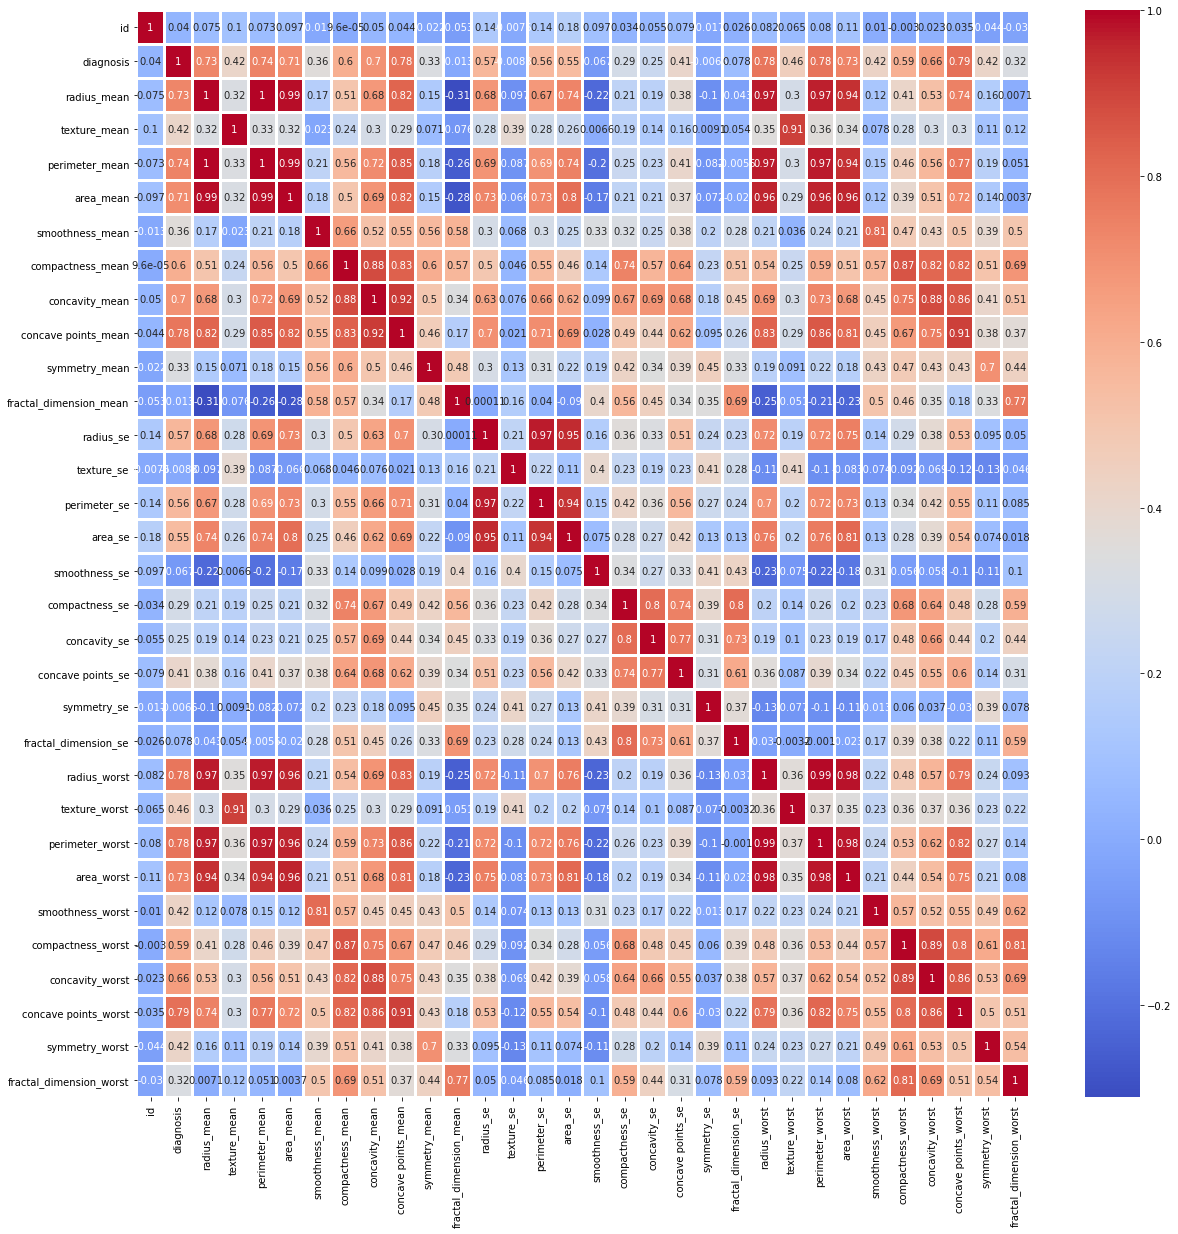

In [19]:
#Heatmap of Correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=2)

<AxesSubplot:>

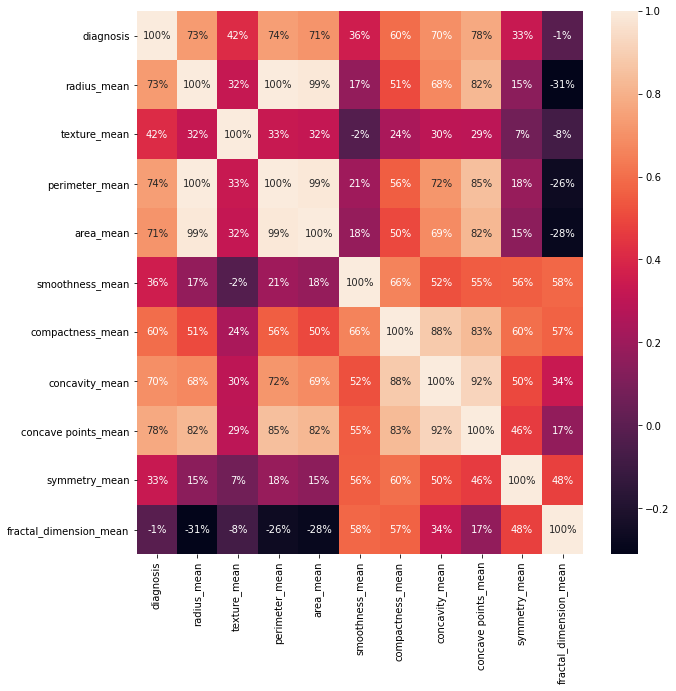

In [20]:
#Getting the correlation of the columns
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt='.0%')

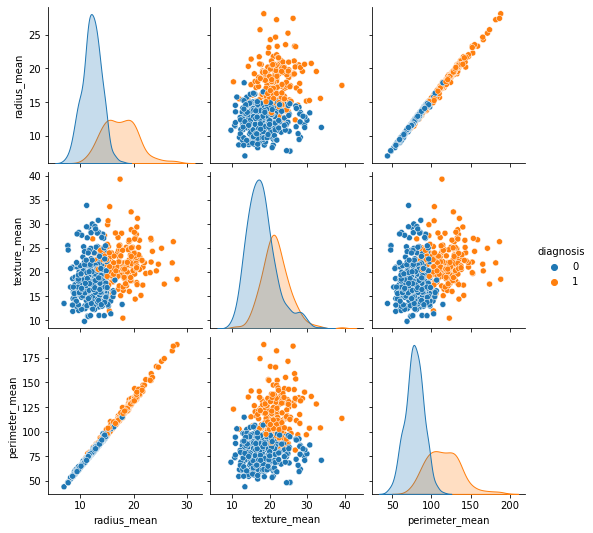

In [21]:
sns.pairplot(df.iloc[:,1:5],hue='diagnosis')

Data Analysis

In [2]:
#Create a function for the Machine Learning models
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=3, n_estimators=20, random_state=0)
    forest.fit(X_train,y_train)
    
    #Support Vector Classifier
    from sklearn.svm import SVC
    svc_classifier=SVC(C=1,kernel='linear')
    svc_classifier.fit(X_train,y_train)
    
    #K-Nearest Neighbor Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    
    #Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB
    nb_classifier=GaussianNB()
    nb_classifier.fit(X_train,y_train)
    
    #Adaboost Classifier
    from sklearn.ensemble import AdaBoostClassifier
    adb_classifier=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'))
    adb_classifier.fit(X_train,y_train)
    
    #XGBoost Classifier
    from xgboost import XGBClassifier
    xgb_classifier=XGBClassifier(eval_metric='logloss')
    xgb_classifier.fit(X_train,y_train)
    
    #Print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy: ',log.score(X_train,y_train))
    print('[1]Decision Tree Classifier Training Accuracy: ',tree.score(X_train,y_train))
    print('[2]Random Forest Classifier Training Accuracy: ',forest.score(X_train,y_train))
    print('[3]Support Vector Classifier Training Accuracy: ',svc_classifier.score(X_train,y_train))
    print('[4]K-Nearest Neighbor Classifier Training Accuracy: ',knn.score(X_train,y_train))
    print('[5]Naive Bayes Classifier Training Accuracy: ',nb_classifier.score(X_train,y_train))
    print('[6]AdaBoost Classifier Training Accuracy: ',adb_classifier.score(X_train,y_train))
    print('[7]XGBoost Classifier Training Accuracy: ',xgb_classifier.score(X_train,y_train))
    
    
    return log,tree,forest,svc_classifier,knn,nb_classifier,adb_classifier,xgb_classifier
    

In [23]:
#Display the training accuracy of all the models
model=models(X_train,y_train)

[0]Logistic Regression Training Accuracy:  0.9906103286384976
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  1.0
[3]Support Vector Classifier Training Accuracy:  0.9882629107981221
[4]K-Nearest Neighbor Classifier Training Accuracy:  0.9765258215962441
[5]Naive Bayes Classifier Training Accuracy:  0.9507042253521126
[6]AdaBoost Classifier Training Accuracy:  1.0
[7]XGBoost Classifier Training Accuracy:  1.0


In [24]:
#Test all models to obtain the most accurate model by generating their confusion matrix and obtaining sensitivity and specificity
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print('Model',i)
    cm=confusion_matrix(y_test,model[i].predict(X_test))
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]

    print("The Confusion Matrix is \n",cm)
    print('Testing Accuracy = ',(TP+TN)/(TP+TN+FP+FN))
    print('Sensitivity = ',TP/(TP+FN))
    print('Specificity = ',TN/(TN+FP))
    print()

Model 0
The Confusion Matrix is 
 [[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951
Sensitivity =  0.9662921348314607
Specificity =  0.9259259259259259

Model 1
The Confusion Matrix is 
 [[83  7]
 [ 2 51]]
Testing Accuracy =  0.9370629370629371
Sensitivity =  0.9764705882352941
Specificity =  0.8793103448275862

Model 2
The Confusion Matrix is 
 [[87  3]
 [ 1 52]]
Testing Accuracy =  0.972027972027972
Sensitivity =  0.9886363636363636
Specificity =  0.9454545454545454

Model 3
The Confusion Matrix is 
 [[86  4]
 [ 2 51]]
Testing Accuracy =  0.958041958041958
Sensitivity =  0.9772727272727273
Specificity =  0.9272727272727272

Model 4
The Confusion Matrix is 
 [[89  1]
 [ 6 47]]
Testing Accuracy =  0.951048951048951
Sensitivity =  0.9368421052631579
Specificity =  0.9791666666666666

Model 5
The Confusion Matrix is 
 [[87  3]
 [ 5 48]]
Testing Accuracy =  0.9440559440559441
Sensitivity =  0.9456521739130435
Specificity =  0.9411764705882353

Model 6
The Confusion Matrix is 
 [[83

In [25]:
#Obtain precision,recall,f1-score,support of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    print('Model',i)
    print(classification_report(y_test,model[i].predict(X_test)))
    print(accuracy_score(y_test,model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model 2
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted av

In [26]:
# Perform Hyperparameter Tuning using Randomized Search on Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
forest1=RandomForestClassifier(random_state=0)
from sklearn.model_selection import RandomizedSearchCV
rs1=RandomizedSearchCV(forest1,
{
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'criterion':['gini','entropy'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10], 
    'max_features' : ['auto', 'sqrt', 'log2']
},
cv=5,
return_train_score=False,
n_iter=3
)
rs1.fit(X_train,y_train)
pd.DataFrame(rs1.cv_results_)[['param_n_estimators','param_criterion','param_min_samples_split','param_max_features','mean_test_score']]

,param_n_estimators,param_criterion,param_min_samples_split,param_max_features,mean_test_score
0,20,entropy,2,auto,0.960109
1,80,entropy,5,sqrt,0.962462
2,90,gini,6,auto,0.955458


In [27]:
params={
    "learning_rate":[0.05,0.10,0,15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [28]:
# Perform Hyperparameter Tuning using Randomized Search on XGBoost Classifier Model
from xgboost import XGBClassifier
xgb1=XGBClassifier(eval_metric='logloss')
from sklearn.model_selection import RandomizedSearchCV
rs2=RandomizedSearchCV(xgb1,param_distributions=params,scoring='roc_auc',n_jobs=-1,verbose=3)

rs2.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [29]:
rs2.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [30]:
xg=XGBClassifier(use_label_encoder=False,base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.5,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.05,
                                           max_delta_step=1, max_depth=10,
                                           min_child_weight=None,
                                           monotone_constraints=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None, n_estimators=100)

In [31]:
#Train the XGBoost Classifier model and obtain its testing accuracy
xg.fit(X_train,y_train)
xg.score(X_test,y_test)

0.9790209790209791

In [32]:
c_m=confusion_matrix(y_test,xg.predict(X_test))
TruePositive=c_m[0][0]
TrueNegative=c_m[1][1]
FalseNegative=c_m[1][0]
FalsePositive=c_m[0][1]

print("The Confusion Matrix is \n",c_m)
print('Testing Accuracy = ',(TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative))
print('Sensitivity = ',TruePositive/(TruePositive+FalseNegative))
print('Specificity = ',TrueNegative/(TrueNegative+FalsePositive))
print()

The Confusion Matrix is 
 [[87  3]
 [ 0 53]]
Testing Accuracy =  0.9790209790209791
Sensitivity =  1.0
Specificity =  0.9464285714285714



In [33]:
#Obtain precision,recall,f1-score,support of the XGBoost Classifier Model
y_pred=xg.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       0.95      1.00      0.97        53

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


In [34]:
#Predicted value of XGBoost Classifier
y_pred=xg.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [35]:
#Original value in the testing set
print(y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


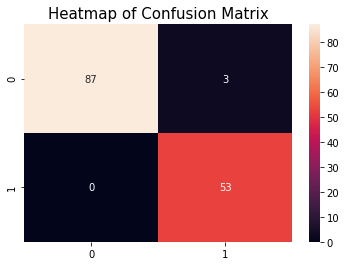

In [36]:
#Obtain Confusion Matrix of the XGBoost Classifier Model
cm=confusion_matrix(y_test,y_pred)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [37]:
#Perform Cross-validation on the XGBoost Classifier Model
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(estimator=xg,X=X_train,y=y_train,cv=10)
print("Cross validation mean accuracy of XGBoost Classifier= ",cross_validation.mean())

Cross validation mean accuracy of XGBoost Classifier=  0.9578073089700997


Communication

In [38]:
#Save the XGBoost Classifier to pickle file for deployment of the model
import pickle
#Saving model
pickle.dump(xg,open('Breast_Cancer_Detection_Mini_Project.pkl','wb'))
#Loading model
breast_cancer_detection_model=pickle.load(open('Breast_Cancer_Detection_Mini_Project.pkl','rb'))
#Predicting the output
y_pred=breast_cancer_detection_model.predict(X_test)
#Confusion Matrix
print('Confusion Matrix of XGBoost Model: \n',confusion_matrix(y_test,y_pred),'\n')
#Show the accuracy
print('Accuracy of XGBoost Model = ',accuracy_score(y_test,y_pred))

Confusion Matrix of XGBoost Model: 
 [[87  3]
 [ 0 53]] 

Accuracy of XGBoost Model =  0.9790209790209791


Thus we have obtained the XGBoost Classifier Model with the best accuracy among all the models trained and tested above.
It has an Accuracy of 97.902%
It has a Sensitivity of 100%
It has a Specificity of 94.642%